  **Additional Assignment.** Figuring out client retention strategies.Compare the monthly payment distribution `MonthlyCharges` of all active clients with the clients who have left. Calculate the following statistics for each group: the average, minimum and maximum values, the median and the values of the 25 and 75% percentiles. Build distribution histograms based on your findings. 
Compare the behavior of the cleinets from the two groups below. 
  For each group, build any two graphs which display:
- the share of Telephone users;
- the share of Internet users.

Setting up, downloading, merging, and preprocessing data

In [2]:
#Set up all the necessary libraries
import pandas as pd
import os
from google.colab import drive
import numpy as np
import datetime
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#download the data files
internet_path='drive/My Drive/Final_provider/final_provider/internet.csv' 
internetDF = pd.read_csv(internet_path, index_col=['customerID'])   
contract_path='drive/My Drive/Final_provider/final_provider/contract.csv'
contractDF=pd.read_csv(contract_path, index_col='customerID')
personal_path='drive/My Drive/Final_provider/final_provider/personal.csv'
personalDF=pd.read_csv(personal_path, index_col=['customerID'])
phone_path='drive/My Drive/Final_provider/final_provider/phone.csv'
phoneDF=pd.read_csv(phone_path, index_col=['customerID'])

In [5]:
phoneDF['PhoneServices']='Yes'

In [6]:
churnDF=pd.DataFrame({'churn': (contractDF['EndDate']!='No').astype(int)})

In [7]:
contractDF.loc[contractDF['EndDate']=='No', 'EndDate'] = pd.datetime(2020,2,1)

In [8]:
contractDF['EndDate']=pd.to_datetime(contractDF['EndDate'])
contractDF['BeginDate']=pd.to_datetime(contractDF['BeginDate'])

In [9]:
contractDF['Tenure']=(contractDF['EndDate']-contractDF['BeginDate']).dt.days.astype(float)
contractDF.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Tenure
customerID,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,31.0
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.5,1036.0
3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,61.0
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,1371.0
9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,61.0


In [10]:
dta=churnDF.join([contractDF, personalDF, phoneDF, internetDF])
dta=dta[dta['TotalCharges'] != ' ']
num_cols=['MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
dta[num_cols]=dta[num_cols].astype(float)
 

In [11]:
partial=['PhoneServices', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']
dta.loc[dta.isna().any(axis=1), partial]='No'


Task 1: compare the monthly payment distribution to all active clients with the clients who have left

In [12]:
dta.groupby('churn')['MonthlyCharges'].count() #find out how many clients overall left vs stayed

churn
0    5163
1    1869
Name: MonthlyCharges, dtype: int64

Text(0.5, 0, 'Monthly payment')

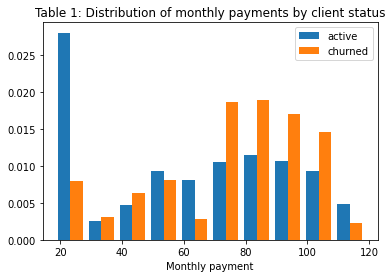

In [16]:
monthly_aсtive = dta[dta['churn']== 0]['MonthlyCharges']
monthly_churn = dta[dta['churn'] == 1]['MonthlyCharges']
plt.hist([monthly_aсtive, monthly_churn], label=['active', 'churned'],density=True),plt.legend(loc='best')   
plt.title('Table 1: Distribution of monthly payments by client status')
plt.xlabel('Monthly payment')

In [19]:
charges=pd.DataFrame(dta[['MonthlyCharges', 'churn']])
charges.astype(int)
def q25(x):
    return x.quantile(0.25)
def q75(x):
    return x.quantile(0.75)
charges.groupby('churn').agg(['mean', 'median', 'min', 'max', q25, q75])
 

MonthlyCharges                                     
                mean median    min     max    q25     q75
churn                                                    
0          61.307408  64.45  18.25  118.75  25.10  88.475
1          74.441332  79.65  18.85  118.35  56.15  94.200

Explanation: The data show that the distribution of monthly charges for clients who left differ from the current clients' distribution. The former clients' monthly payments were higher on average (75) vs the current clients (61 average). As evident from Table 1, former clients' payments were concentrated on a higher end than the current clients. Half of the former clients paid 79.65 or more a month. That is 15 units more than the current clients. 


Task 2: compare the behavior of the clients from the two groups: the share of telephone users and the share of internet users. 

In [21]:
dta.groupby('PhoneServices')['churn'].agg(['count','mean'])


,count,mean
PhoneServices,,
No,2200,0.128636
Yes,4832,0.328228


In [22]:
dta.groupby('InternetService')['churn'].agg(['count', 'mean'])


,count,mean
InternetService,,
DSL,1736,0.166475
Fiber optic,3096,0.418928
No,2200,0.128636


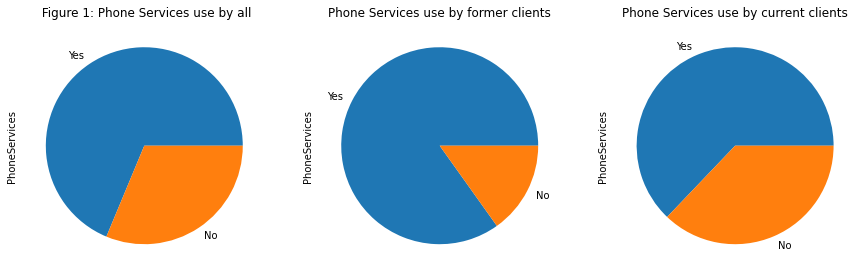

In [23]:
plt.show()
plt.figure(figsize=(15,8))
plt.subplot(1, 3, 1)
dta['PhoneServices'].value_counts().plot(kind='pie', title=' Figure 1: Phone Services use by all')
plt.subplot(1, 3, 2)
churned_phone = dta[dta['churn'] == 1]['PhoneServices']
churned_phone.value_counts().plot(kind='pie', ax=plt.gca(), title='Phone Services use by former clients')
plt.subplot(1,3,3)
phone_current=dta[dta['churn']==0]['PhoneServices']
phone_current.value_counts().plot(kind='pie', ax=plt.gca(), title='Phone Services use by current clients')

In [24]:
print('Overall use of phone services, %:')
print(round(dta['PhoneServices'].value_counts()/len(dta)*100, 0))
print('')
print('-----------------------------------------')
print('Use of phone services by former clients, %:')
display(round(churned_phone.value_counts()/len(churned_phone)*100,0))
print('-----------------------------------------')
print('Use of phone services by current clients, %:')
display(round(phone_current.value_counts()/len(phone_current)*100,0))

Overall use of phone services, %:
Yes    69.0
No     31.0
Name: PhoneServices, dtype: float64

-----------------------------------------
Use of phone services by former clients, %:


Yes    85.0
No     15.0
Name: PhoneServices, dtype: float64

-----------------------------------------
Use of phone services by current clients, %:


Yes    63.0
No     37.0
Name: PhoneServices, dtype: float64

**Analysis of phone services use:** Overall, 69% of clients used phone services. The use of phone services was more prevalent among the clients who left. Only 15% of former clients did not use phone services. Among the current customers, 37% do not use phone services.

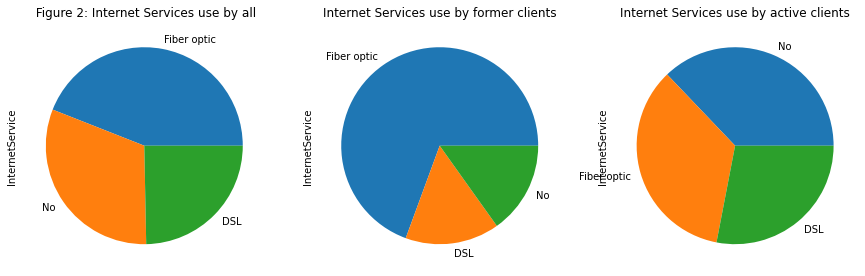

In [25]:
plt.show()
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
dta['InternetService'].value_counts().plot(kind='pie', title=' Figure 2: Internet Services use by all')
plt.subplot(1, 3, 3)
active_internet=dta[dta['churn']==0]['InternetService']
active_internet.value_counts().plot(kind='pie', ax=plt.gca(), title='Internet Services use by active clients') 
plt.subplot(1, 3, 2)
churned_internet = dta[dta['churn'] == 1]['InternetService']
churned_internet.value_counts().plot(kind='pie', ax=plt.gca(), title='Internet Services use by former clients')


In [26]:
print('Distribution of Internet use, all clients, %')
print(round(dta['InternetService'].value_counts()/len(dta)*100, 0))
print('-------------------------------------------')
print('Distribution of Interent use, former clients, %')
print(round(churned_internet.value_counts()/len(churned_internet)*100, 0))
print('-------------------------------------------')
print('Distribution of Internet use, current clients, %')
print(round(active_internet.value_counts()/len(active_internet)*100, 0))

Distribution of Internet use, all clients, %
Fiber optic    44.0
No             31.0
DSL            25.0
Name: InternetService, dtype: float64
-------------------------------------------
Distribution of Interent use, former clients, %
Fiber optic    69.0
DSL            15.0
No             15.0
Name: InternetService, dtype: float64
-------------------------------------------
Distribution of Internet use, current clients, %
No             37.0
Fiber optic    35.0
DSL            28.0
Name: InternetService, dtype: float64


**Analysis of internet use**: Overall, Fiber optic option is the most popular for clients. About 31% of all clients did purchase internet services from the provide. In the former customers' category, only 15% of clients do not use internet, while the predominant majority (69%) use fiber optic internet. The current, active, customers's share of no internet services and fiber optic lingers around 35-37%. About 18% of current customers are still using the DSL internet. The prevalence of former customers' preference for fiber optic may indicate more research into the quality, speed, pricing options and competition for the fiber optic segment of internet services market. 